In [2]:
import numpy as np

from ffnavpy.analysis import run_analysis
from ffnavpy.plotting import save_plots, plot_results, plot_position


%load_ext autoreload
%autoreload 2

c:\Users\juan.bermejo\.conda\envs\ffnavpy-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Simulation configuration

In [3]:
# Initial state of deputy [km, km/s]

x0 = np.array(
    [
        1.5097937630e11,
        -4.6840029080e-08,
        1.8369701987e-08,
        -6.0196990433e-15,
        1.5667113355e02,
        -1.1858897424e02,
    ]
)  # [m / m/s], 'P1-IdealSynodic', Sun-Earth
x0 = np.array([ 1.51221927e+11,
                1.46847862e+07,
                3.13475840e+08,
               -1.76215637e+01,
               -1.53877076e+02,
               -1.02571790e+00])

# Initial relative state [km, km/s]
dx0 = np.array([-6600, -1100, 0, 0, 0, 0])



# State commanded
x_target = np.array([-6600, -1100, 0, 0, 0, 0])

# Duration of the simulation [s]
tf = 3600 * 24 * 5

# Time step of simulation [s]
dT = 100

configOBC = {'x_target': x_target, 
             'estimation_mode': 'kalman',
             'control_mode': 'ETM',
             'Tsk': 100,
             'sigma_r0': 1e-6,
             'sigma_v0': 1e-6,
             'sigma_x': 1e-4,
             'sigma_y': 1e-4,
             'sigma_z': 1e-4,
             'period': 6*3600,
             'horizon': 10,
             'u_threshold_v': np.ones(3) * 0.0015,
             'x_threshold': np.concatenate([1*np.ones(3),0.001*np.ones(3)]),
             'thrust_nominal' : 1e-3,
             'tb_min' : 0.01,
             'tb_lower_limit': 0.008,
             'X0' : dx0,
             'Rkoz' : 5500
             }

configSim = {'sigma_distance': 1e-04, 'sigma_angle': 0.25}

# cmd_sequence = CommandSequence()
# cmd_sequence.add_command('change_control_mode', 'simple', 1000)
# cmd_sequence.add_command('change_estimation_mode', 'kalman', 3000)
# cmd_sequence.add_command('change_control_mode', 'LQR', 4800)
# cmd_sequence.add_command('change_control_mode', 'ETM', 3600*2)

# Create predefined case for chief-deputy formation
# simcase = ChiefDeputyCase(LiteBird, CalSat, cmd_sequence=cmd_sequence, configOBC=ConfigOBC)



### ETM analysis

In [4]:
sim_etm = run_analysis(x0, dx0, x_target, tf, dT, configOBC, configSim)

100%|██████████| 4321/4321 [01:03<00:00, 68.00it/s]


### MPC analysis

In [5]:
configOBC['control_mode'] = 'MPC'
configOBC['period'] = 6*3600
configOBC['collision_avoidance'] = True

In [6]:
sim_mpc = run_analysis(x0, dx0, x_target, tf, dT, configOBC, configSim)

100%|██████████| 4321/4321 [01:02<00:00, 68.62it/s]


In [7]:
xdstyle = {
        "color": "b",
        "linestyle": "-",
        "linewidth": 1.2,
        # "marker": "+",
        "markersize": 4,
    }

fontdict = {'family': 'serif',
        'weight': 'normal',
        'size': 12,
        }

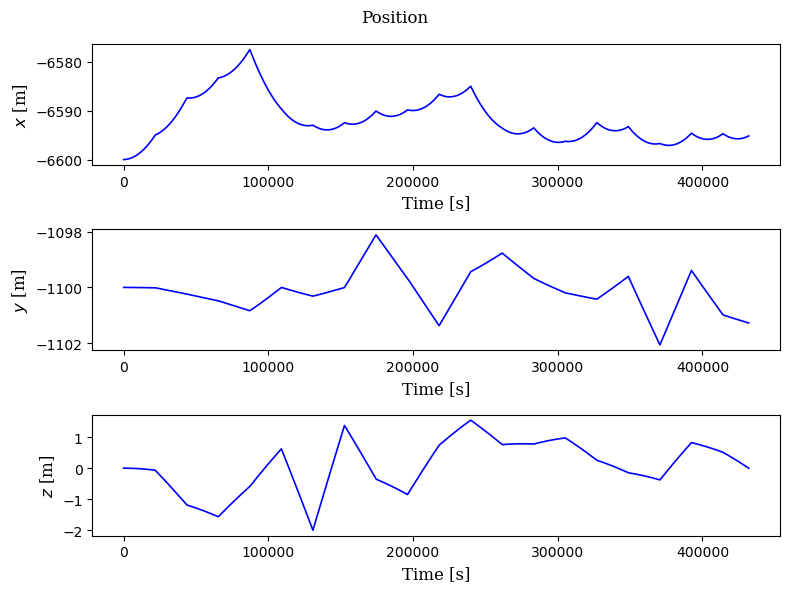

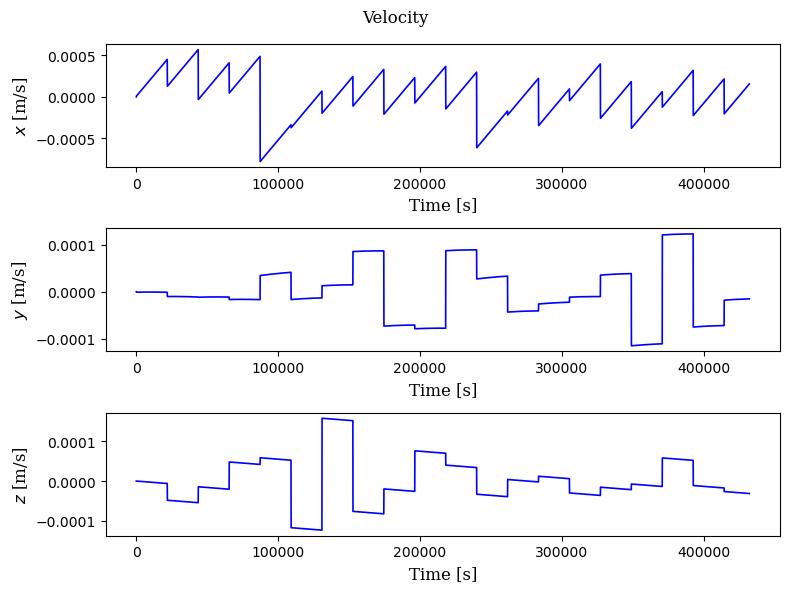

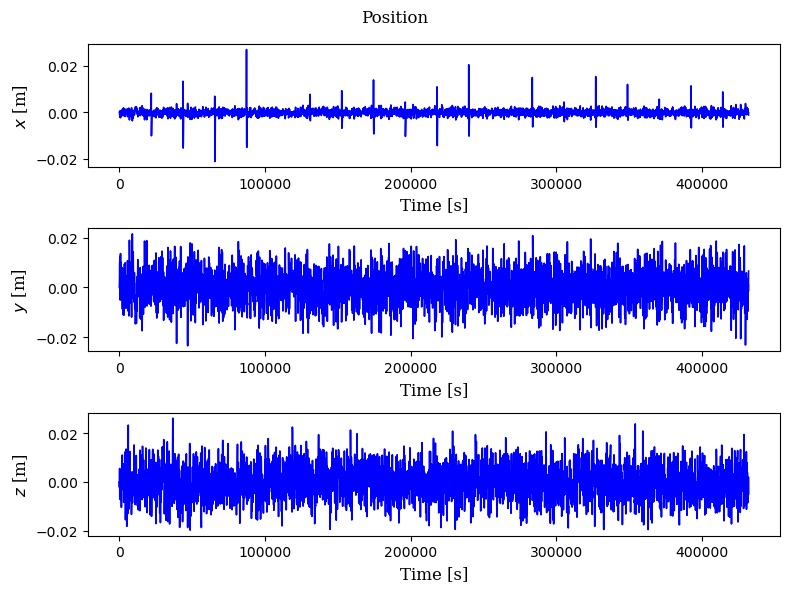

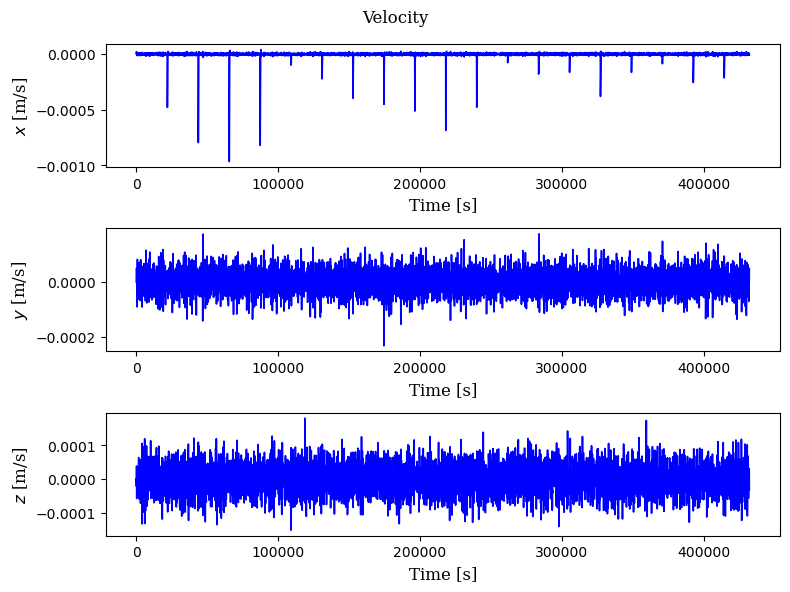

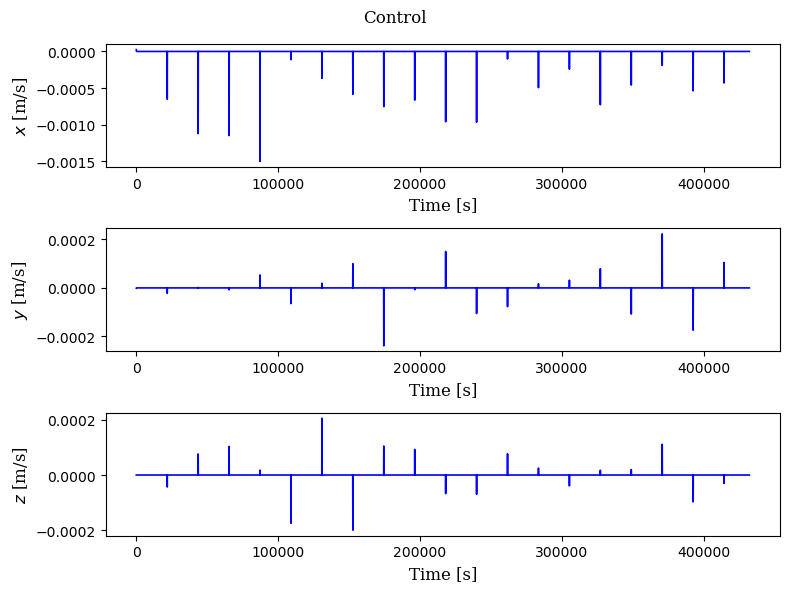

In [8]:
fig_dict_etm = plot_results(sim_etm, xdstyle, fontdict)
save_plots(fig_dict_etm, "standby_etm", "stand_by_cs")

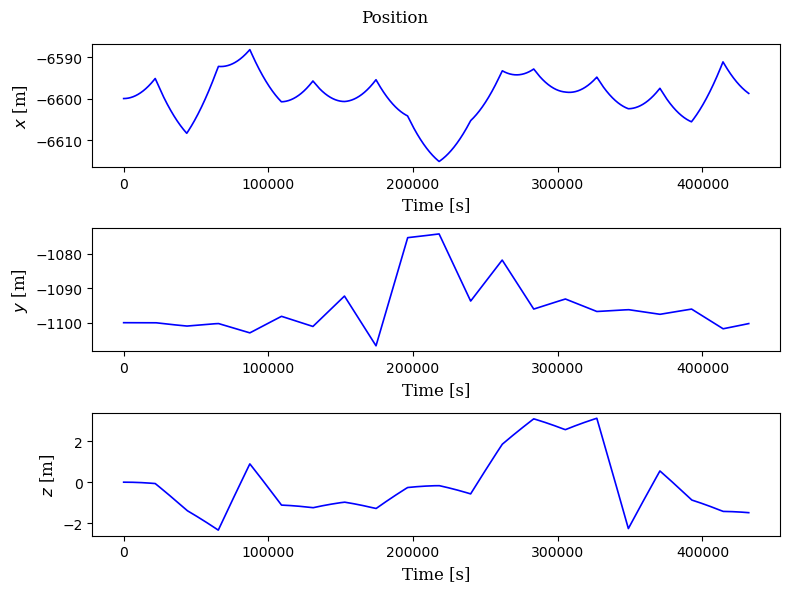

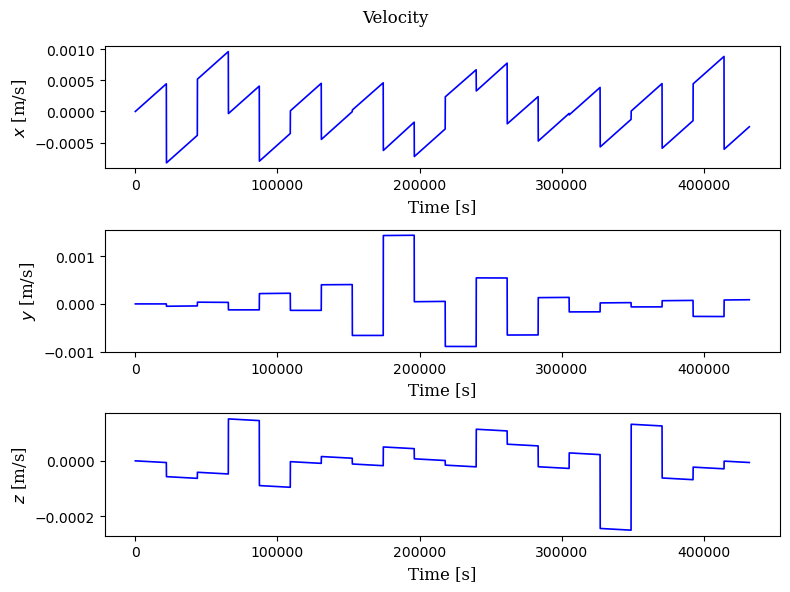

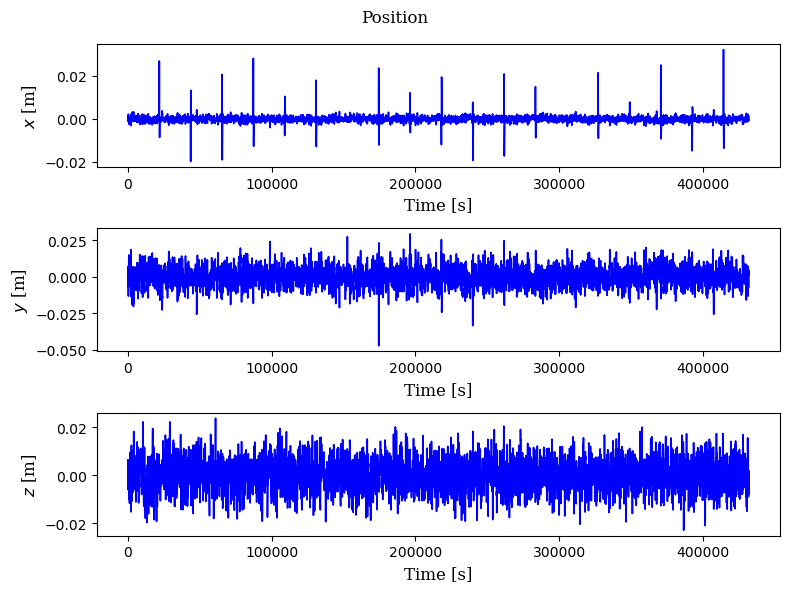

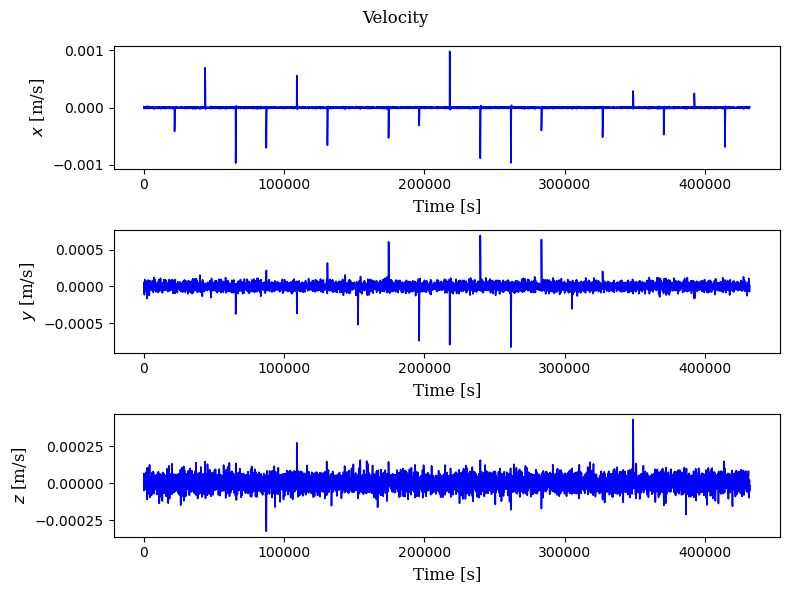

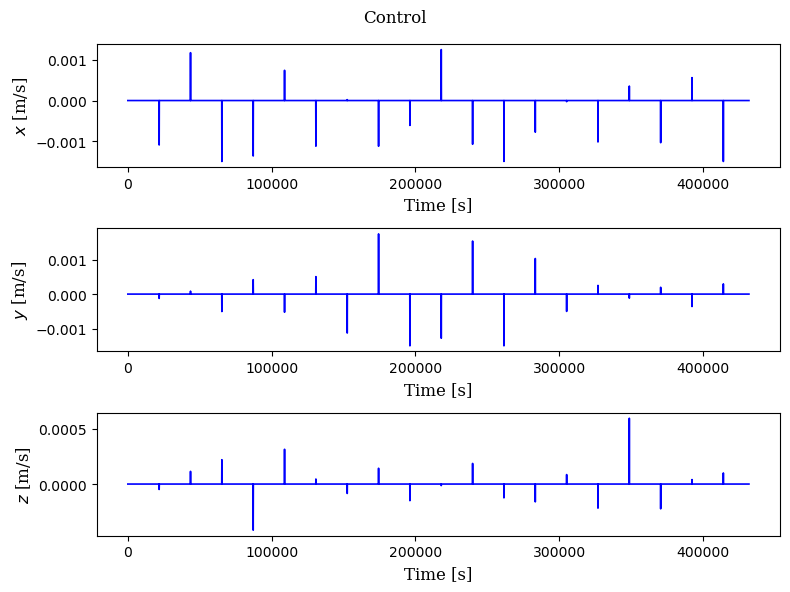

In [9]:
fig_dict_mpc = plot_results(sim_mpc, xdstyle, fontdict)
save_plots(fig_dict_mpc, "standby_mpc", "stand_by_cs")

In [10]:
sim_etm.report.DV

0.015193227109915048

In [11]:
sim_mpc.report.DV*365/5*3

7.6154492193574

In [12]:
0.013*365*3/5

2.847

In [47]:
100*9.8*np.log((6.89+.1)/6.89)/1.2

11.767734829790447

In [24]:
85*9.8

833.0000000000001

In [42]:
np.exp(13.32/(100*9.8))*7.2-7.2

0.09852930476399724

In [49]:
0.48+0.95+2.25+1.11+1.3+0.9+0.15

7.140000000000001

In [50]:
6.89*1.2

8.267999999999999

In [41]:
(5.37+1.35+1.18 + 0.2+3)*1.2

13.319999999999999

In [15]:
20/2500

0.008

In [16]:
0.02/0.008

2.5

In [17]:
(0.1/10)/(10/1000)

1.0

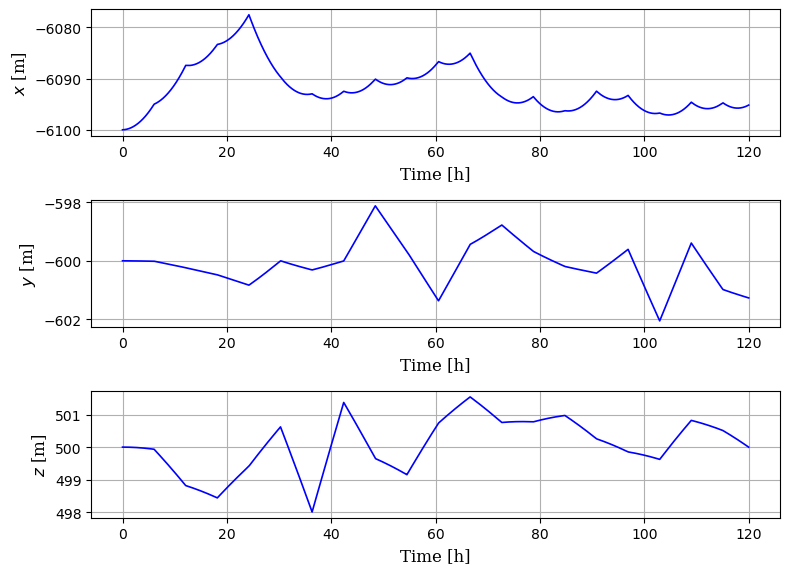

In [18]:
fig, ax = plot_position(sim_etm.report.time/3600, sim_etm.report.relative_state[:3,:]+500, xdstyle=xdstyle, fontdict=fontdict, units=("h", "m"))
fig.suptitle('')
fig.tight_layout()


for axis in ax:
    axis.grid()
#     axis.hlines([99.9, 100.1], sim_lqr.report.time[0]/60, sim_lqr.report.time[-1]/60, colors='k', linestyle='--', linewidth=1)

save_plots({'position_error':(fig, ax)}, "standby_etm", "stand_by_cs_f")

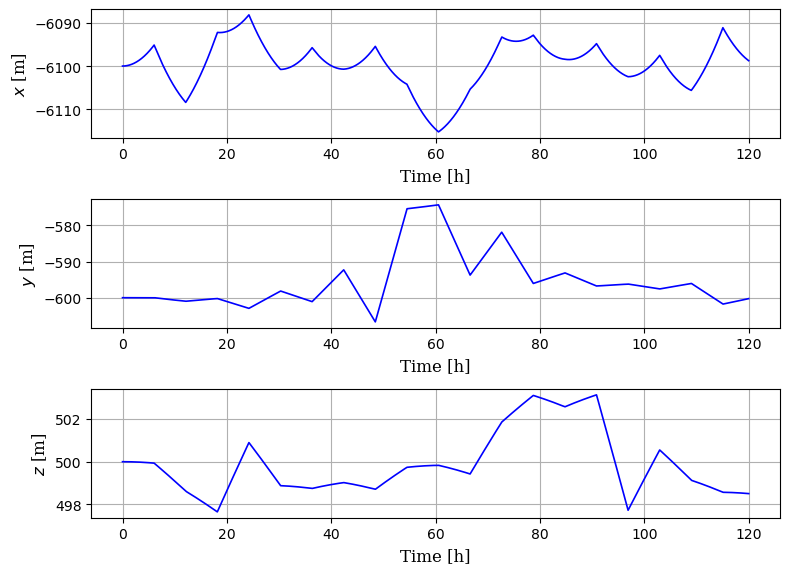

In [19]:
fig, ax = plot_position(sim_mpc.report.time/3600, sim_mpc.report.relative_state[:3,:]+500, xdstyle=xdstyle, fontdict=fontdict, units=("h", "m"))
fig.suptitle('')
fig.tight_layout()


for axis in ax:
    axis.grid()
#     axis.hlines([99.9, 100.1], sim_lqr.report.time[0]/60, sim_lqr.report.time[-1]/60, colors='k', linestyle='--', linewidth=1)

save_plots({'position_error':(fig, ax)}, "standby_mpc", "stand_by_cs_f")

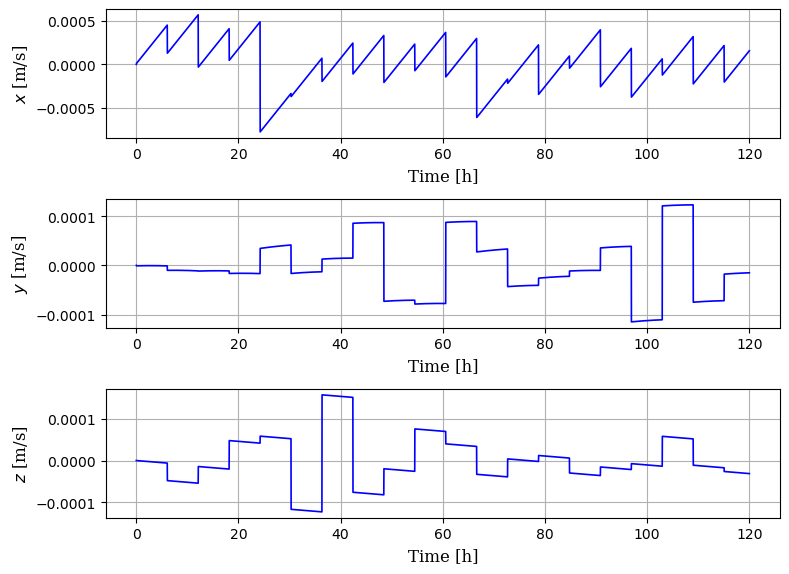

In [20]:
fig, ax = plot_position(sim_etm.report.time/3600, sim_etm.report.relative_state[3:,:], xdstyle=xdstyle, fontdict=fontdict, units=("h", "m/s"))
fig.suptitle('')
fig.tight_layout()


for axis in ax:
    axis.grid()
#     axis.hlines([99.9, 100.1], sim_lqr.report.time[0]/60, sim_lqr.report.time[-1]/60, colors='k', linestyle='--', linewidth=1)

save_plots({'velocity':(fig, ax)}, "standby_etm", "stand_by_cs_f")

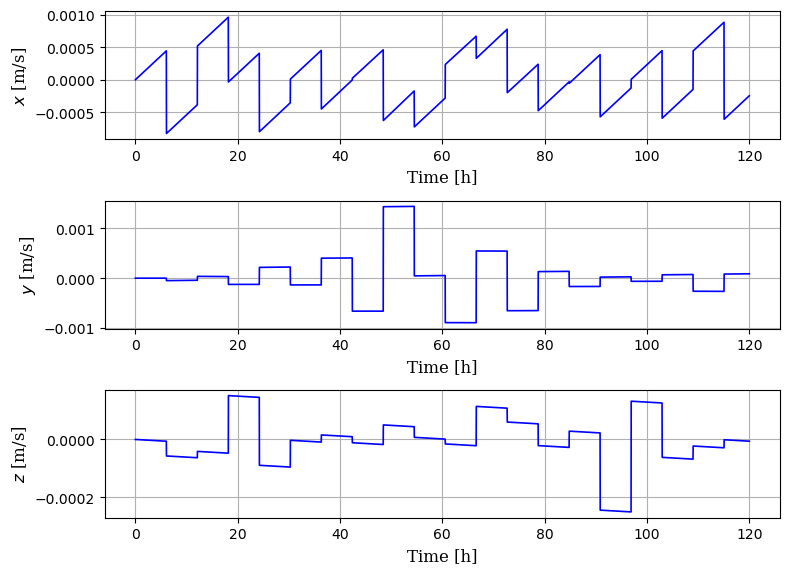

In [21]:
fig, ax = plot_position(sim_mpc.report.time/3600, sim_mpc.report.relative_state[3:, :], xdstyle=xdstyle, fontdict=fontdict, units=("h", "m/s"))
fig.suptitle('')
fig.tight_layout()


for axis in ax:
    axis.grid()
#     axis.hlines([99.9, 100.1], sim_lqr.report.time[0]/60, sim_lqr.report.time[-1]/60, colors='k', linestyle='--', linewidth=1)

save_plots({'velocity':(fig, ax)}, "standby_mpc", "stand_by_cs_f")

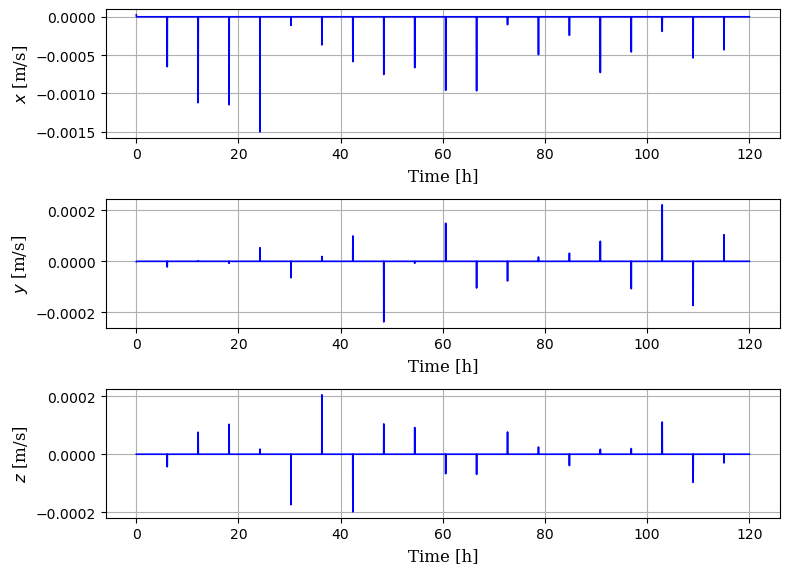

In [22]:
fig, ax = plot_position(sim_etm.report.time/3600, sim_etm.report.u_cmd, xdstyle=xdstyle, fontdict=fontdict, units=("h", "m/s"))
fig.suptitle('')
fig.tight_layout()


for axis in ax:
    axis.grid()
#     axis.hlines([99.9, 100.1], sim_lqr.report.time[0]/60, sim_lqr.report.time[-1]/60, colors='k', linestyle='--', linewidth=1)

save_plots({'control':(fig, ax)}, "standby_etm", "stand_by_cs_f")

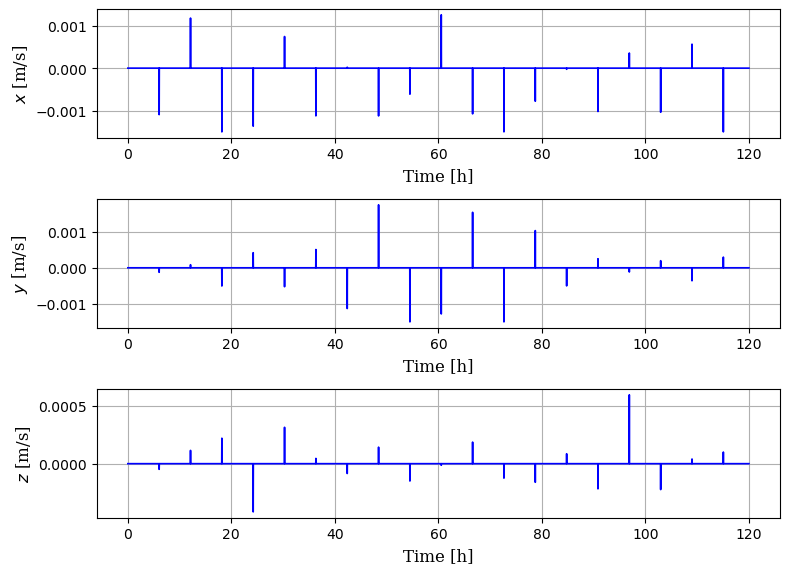

In [23]:
fig, ax = plot_position(sim_mpc.report.time/3600, sim_mpc.report.u_cmd, xdstyle=xdstyle, fontdict=fontdict, units=("h", "m/s"))
fig.suptitle('')
fig.tight_layout()


for axis in ax:
    axis.grid()
#     axis.hlines([99.9, 100.1], sim_lqr.report.time[0]/60, sim_lqr.report.time[-1]/60, colors='k', linestyle='--', linewidth=1)

save_plots({'control':(fig, ax)}, "standby_mpc", "stand_by_cs_f")